In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [150]:
df = pd.read_csv('drug.csv')
# df

In [151]:
drdf = df.drop(['sex'],axis=1)
# drdf

# Without Sex column

In [152]:
test_frac = 0.3
test = drdf.sample(frac=test_frac)
ws_test_x = pd.DataFrame(test.iloc[:,0])
ws_test_y = pd.DataFrame(test.iloc[:,1])

train = drdf.loc[~(drdf.index.isin(test.index))]
ws_train_x = pd.DataFrame(train.iloc[:,0])
ws_train_y = pd.DataFrame(train.iloc[:,1])
print(drdf.shape, test.shape, train.shape)

(3200, 2) (960, 2) (2240, 2)


In [153]:
lr = linear_model.LinearRegression()

lr.fit(ws_train_x,ws_train_y)

op = lr.predict(ws_test_x)

In [154]:
ws_errors = []
ty = list(ws_test_y.iloc[:,0])
for i in range(len(op)):
    temp = ty[i]-op[i][0]
    ws_errors.append(temp)
# print(errors)

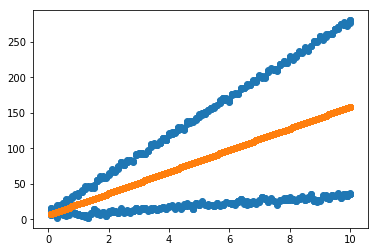

In [155]:
plt.scatter(ws_test_x,ws_test_y)
plt.scatter(ws_test_x,op)
plt.show()

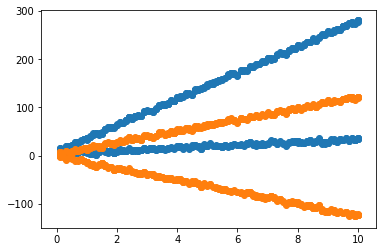

In [156]:
plt.scatter(ws_test_x,ws_test_y)
plt.scatter(ws_test_x,ws_errors)
plt.show()

(array([21., 15., 26.,  7., 12., 19., 22.,  6.,  9., 29., 13., 19., 15.,
        14.,  6.,  8., 22., 11., 20., 18., 11., 22., 14., 25., 12., 21.,
        18.,  9., 11., 10., 12.,  6., 21., 20., 17.,  8., 18., 12., 21.,
        19., 16., 26., 16., 23., 20., 14., 20., 18., 18., 12., 16., 16.,
        15., 18., 15., 12.,  8., 20., 19., 19.]),
 array([-124.72686649, -120.61092591, -116.49498533, -112.37904475,
        -108.26310417, -104.14716359, -100.03122301,  -95.91528243,
         -91.79934185,  -87.68340128,  -83.5674607 ,  -79.45152012,
         -75.33557954,  -71.21963896,  -67.10369838,  -62.9877578 ,
         -58.87181722,  -54.75587664,  -50.63993606,  -46.52399548,
         -42.4080549 ,  -38.29211432,  -34.17617374,  -30.06023317,
         -25.94429259,  -21.82835201,  -17.71241143,  -13.59647085,
          -9.48053027,   -5.36458969,   -1.24864911,    2.86729147,
           6.98323205,   11.09917263,   15.21511321,   19.33105379,
          23.44699437,   27.56293494,   31.678

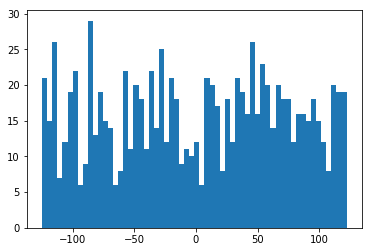

In [171]:
plt.hist(ws_errors,bins=60)

# With both columns

In [158]:
test_frac = 0.3
test = df.sample(frac=test_frac)
test_x = pd.DataFrame(test.iloc[:,:2])
test_y = pd.DataFrame(test.iloc[:,2])

train = df.loc[~(drdf.index.isin(test.index))]
train_x = pd.DataFrame(train.iloc[:,:2])
train_y = pd.DataFrame(train.iloc[:,2])
print(df.shape, test.shape, train.shape)

(3200, 3) (960, 3) (2240, 3)


In [159]:
lr = linear_model.LinearRegression()

lr.fit(train_x,train_y)

op_s = lr.predict(test_x)

In [160]:
print(mean_squared_error(test_y,op_s))

1247.2174348137098


In [161]:
errors = []
ty = list(test_y.iloc[:,0])
for i in range(len(op)):
    temp = ty[i]-op[i][0]
    errors.append(temp)
# print(errors)

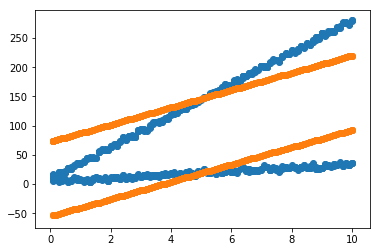

In [162]:
plt.scatter(test_x['dose'],test_y)
plt.scatter(test_x['dose'],op_s)
plt.show()

(array([ 3., 10., 17., 27., 16., 30., 28., 26., 17., 29., 29., 23., 23.,
        25., 26., 39., 44., 30., 29., 33., 35., 31., 41., 18., 18., 15.,
         9., 13.,  5.,  9., 15., 14., 14., 12., 10., 11.,  8., 10., 16.,
        12.,  8.,  8.,  9., 14.,  7.,  9., 11., 17.,  8.,  7.,  7.,  6.,
         9.,  2.,  6.,  2.,  4.,  1.,  1.,  4.]),
 array([-153.77330125, -146.88562448, -139.9979477 , -133.11027093,
        -126.22259416, -119.33491739, -112.44724062, -105.55956384,
         -98.67188707,  -91.7842103 ,  -84.89653353,  -78.00885676,
         -71.12117999,  -64.23350321,  -57.34582644,  -50.45814967,
         -43.5704729 ,  -36.68279613,  -29.79511935,  -22.90744258,
         -16.01976581,   -9.13208904,   -2.24441227,    4.64326451,
          11.53094128,   18.41861805,   25.30629482,   32.19397159,
          39.08164836,   45.96932514,   52.85700191,   59.74467868,
          66.63235545,   73.52003222,   80.407709  ,   87.29538577,
          94.18306254,  101.07073931,  107.958

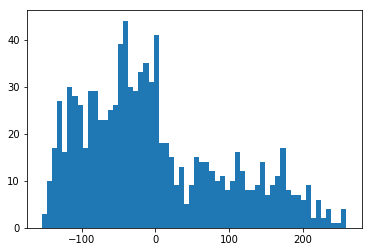

In [172]:
plt.hist(errors,bins=60)

# Using Statsmodels.api's OLS Regression

In [164]:
import statsmodels.api as sm
m = sm.OLS(train_y,train_x)
model = m.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     7662.
Date:                Wed, 13 Feb 2019   Prob (F-statistic):               0.00
Time:                        17:17:55   Log-Likelihood:                -11573.
No. Observations:                2240   AIC:                         2.315e+04
Df Residuals:                    2238   BIC:                         2.316e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sex          105.7825      1.608     65.774      0.0

# Adding another feature (Dose * Sex)

In [165]:
train_x['dose_into_sex'] = train_x['dose'] * train_x['sex']
test_x['dose_into_sex'] = test_x['dose'] * test_x['sex']
train_x

,sex,dose,dose_into_sex
1,1,0.2,0.2
2,1,0.3,0.3
3,1,0.4,0.4
5,1,0.6,0.6
7,1,0.8,0.8
8,1,0.9,0.9
10,1,1.1,1.1
11,1,1.2,1.2
12,1,1.3,1.3
13,1,1.4,1.4


In [166]:
m = sm.OLS(train_y,train_x)
model = m.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.270e+06
Date:                Wed, 13 Feb 2019   Prob (F-statistic):               0.00
Time:                        17:17:56   Log-Likelihood:                -5546.7
No. Observations:                2240   AIC:                         1.110e+04
Df Residuals:                    2237   BIC:                         1.112e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sex               9.7458      0.176     55.358

In [167]:
op = model.predict(test_x)
mse_final = mean_squared_error(test_y,op)
print(list(op))

[11.736270477020572, 174.7670227294156, 28.682701597724677, 199.1144095846974, 193.70387917241257, 11.369512024613678, 47.61955804072164, 31.541226906992783, 30.07419309736521, 22.739024049227357, 193.70387917241257, 19.43819797756532, 30.44095154977211, 4.401101428882714, 17.237647263123964, 2.5673091668482497, 13.203304286648143, 30.07419309736521, 247.80918329526108, 15.770613453496392, 142.30384025570652, 28.24040083533075, 28.24040083533075, 182.88281834784289, 153.1249010802762, 20.171714882379106, 201.81967479083983, 6.968410595730964, 126.07224901885195, 112.54592298813982, 236.98812247069137, 20.538473334785998, 34.47529452624793, 220.7565312338368, 30.07419309736521, 6.968410595730964, 2.934067619255143, 180.17755314170043, 269.4513049444004, 166.65122711098832, 204.52493999698225, 155.83016628641863, 13.203304286648143, 253.2197137075459, 177.47228793555803, 32.641502264213464, 13.936821191461927, 3.6675845240689284, 4.034342976475822, 255.9249789136883, 32.27474381180657, 7

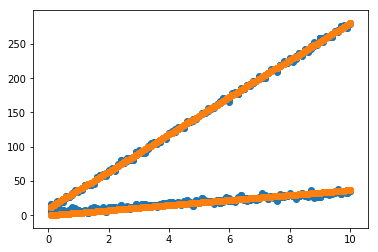

In [168]:
plt.scatter(test_x['dose'],test_y)
plt.scatter(test_x['dose'],op)
plt.show()

In [169]:
errors_final_model = []
ty = list(test_y.iloc[:,0])
lop = list(op)
print(len(lop),len(ty))
for i in range(len(lop)):
    print(ty[i]-lop[i])
    temp = ty[i]-lop[i]
    errors_final_model.append(temp)

960 960
4.963729522979428
1.7829772705844107
-1.8527015977246784
3.8055904153025892
2.56612082758744
4.220487975386321
-3.009558040721643
-0.9912269069927824
-3.794193097365209
-0.8390240492273584
-0.6938791724125792
-0.5281979775653198
-2.0809515497721094
2.638898571117286
2.1923527368760354
3.3826908331517505
-0.523304286648143
-3.4541930973652093
4.230816704738913
4.039386546503607
-0.42384025570652284
-1.2904008353307503
-1.480400835330748
1.2271816521571282
0.9050989197237982
-2.3717148823791057
-1.1796747908398402
-0.47841059573096345
1.4177509811480462
-0.3559229881398238
-1.4881224706913656
0.8415266652140012
-3.00529452624793
3.733468766163213
-5.73419309736521
-2.1784105957309636
9.065932380744858
-3.467553141700421
0.3386950555996009
4.968772889011689
-3.6449399969822593
0.689833713581379
0.04669571335185729
4.040286292454084
-0.13228793555802554
-6.081502264213466
2.763178808538072
3.7124154759310715
0.2656570235241782
-2.564978913688293
-4.5147438118065715
4.90807249945524

(array([ 1.,  0.,  1.,  0.,  3.,  8.,  6.,  5.,  4.,  9., 11.,  4.,  5.,
         9., 19., 16., 12., 21., 22., 19., 23., 22., 32., 44., 38., 39.,
        36., 42., 31., 37., 25., 48., 34., 29., 40., 32., 30., 27., 25.,
        24., 20., 21., 17.,  8., 13.,  8.,  4.,  6.,  4.,  7.,  7.,  1.,
         2.,  4.,  2.,  2.,  0.,  0.,  0.,  1.]),
 array([-7.43364238e+00, -7.15864947e+00, -6.88365656e+00, -6.60866364e+00,
        -6.33367073e+00, -6.05867782e+00, -5.78368491e+00, -5.50869199e+00,
        -5.23369908e+00, -4.95870617e+00, -4.68371326e+00, -4.40872034e+00,
        -4.13372743e+00, -3.85873452e+00, -3.58374160e+00, -3.30874869e+00,
        -3.03375578e+00, -2.75876287e+00, -2.48376995e+00, -2.20877704e+00,
        -1.93378413e+00, -1.65879122e+00, -1.38379830e+00, -1.10880539e+00,
        -8.33812477e-01, -5.58819565e-01, -2.83826652e-01, -8.83373927e-03,
         2.66159173e-01,  5.41152086e-01,  8.16144999e-01,  1.09113791e+00,
         1.36613082e+00,  1.64112374e+00,  1.91611

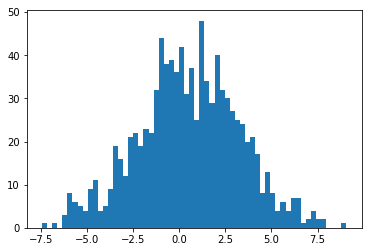

In [173]:
plt.hist(errors_final_model,bins=60)